## Solar Power Prediction using Linear Regression Model

### Week-1

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Load the dataset
df=pd.read_csv('dataset/solar_data.csv')
# Display first few rows of the dataset
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [5]:
df.tail()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
4208                       1025.1                      0.0   
4209                       1026.1                      0.0   
4210                       1026.3                      0.1   
4211                       1025.5                      0.0   
4212                       1025.3                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
4208                  0.0                  100.0   
4209                  0.0                  100.0   
4210                  0.0                  100.0   
4211                  0.0                  100.0   
4212                  0.0                  100.0   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
4208                            100                             100   
4209                             79                             100   
4210                             73                             100   
4211                             74                              66   
4212                            100                             100   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
4208                          100                             257.21  ...   
4209                          100                             210.04  ...   
4210                          100                             113.92  ...   
4211                          100                             186.90  ...   
4212                          100                             172.66  ...   

      wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
4208                         285.42                      25.50   
4209                           6.91                      13.00   
4210                           2.29                       8.71   
4211                          11.31                       6.29   
4212                          12.72                      12.07   

      wind_direction_80_m_above_gnd  wind_speed_900_mb  wind_direction_900_mb  \
4208                         283.06              24.01                 282.99   
4209                           4.76              11.61                   7.13   
4210                         352.87               7.95                 354.81   
4211                          13.24               5.94                  14.04   
4212                          17.35              11.38                  18.43   

      wind_gust_10_m_above_gnd  angle_of_incidence     zenith    azimuth  \
4208                     25.20           22.700907  64.952098  167.06794   
4209                     10.44           19.307487  63.895118  182.28247   
4210                     22.32           25.249506  65.827032  197.33868   
4211                     15.48           36.361161  70.496313  211.30027   
4212                     16.20           48.452849  76.919574  223.04931   

      generated_power_kw  
4208          173.410560  
4209          403.792220  
4210          158.367780  
4211          126.953060  
4212           20.055031  

[5 rows x 21 columns]

In [6]:
# To check total number of rows and columns
df.shape

(4213, 21)

In [7]:
#Display summary
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [8]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [9]:
# check for missing values
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [10]:
# chck for duplicate values
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

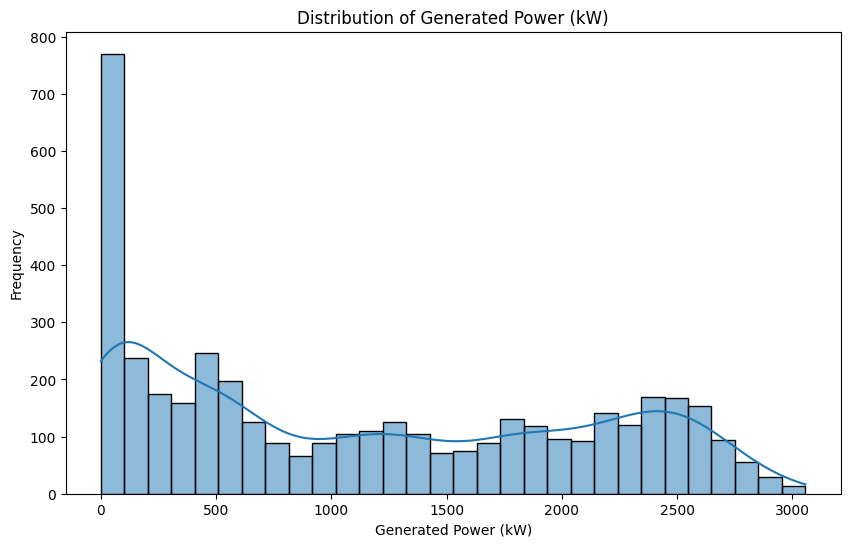

In [13]:
# plot distribution of power
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title("Distribution of Generated Power (kW)")
plt.xlabel("Generated Power (kW)")
plt.ylabel("Frequency")

In [14]:
# Simplified EDA and Data Cleaning for Solar Power Prediction

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/solar_data.csv')

# Display basic dataset information
display(df.head())
print(df.info())

# Check for missing values and handle them
df.fillna(df.mean(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Summary statistics
display(df.describe())

# Display correlation values as a table
correlations = df.corr()
print("Correlation Table:")
print(correlations)

# Distribution of Generated Power
sns.histplot(df['generated_power_kw'], kde=True, bins=30)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()



temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

Correlation Table:
                                   temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.402240   
total_precipitation_sfc                            -0.083137   
snowfall_amount_sfc                                -0.121422   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.019522   
medium_cloud_cover_mid_cld_lay                     -0.100980   
low_cloud_cover_low_cld_lay                        -0.381876   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.172532   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.244869   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb    

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

Correlation Table:
                                   temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.402240   
total_precipitation_sfc                            -0.083137   
snowfall_amount_sfc                                -0.121422   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.019522   
medium_cloud_cover_mid_cld_lay                     -0.100980   
low_cloud_cover_low_cld_lay                        -0.381876   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.172532   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.244869   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb    

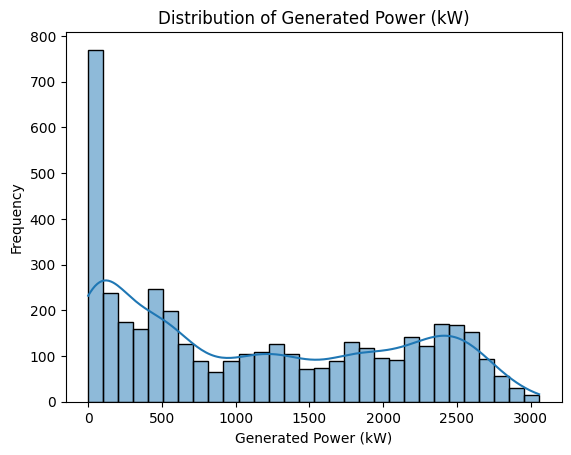

Mean Absolute Error (MAE): 391.7926956840309
Mean Squared Error (MSE): 257589.0576940828
R-squared (R2): 0.7180084563489006


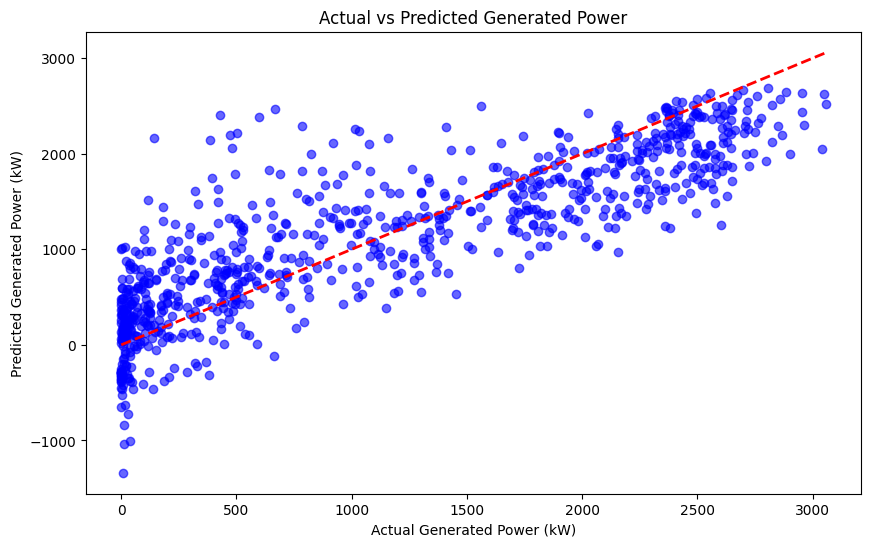

In [15]:
# Comprehensive Workflow for Solar Power Prediction

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('dataset/solar_data.csv')

# Display basic dataset information
display(df.head())
print(df.info())

# Check for missing values and handle them
df.fillna(df.mean(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Summary statistics
display(df.describe())

# Display correlation values as a table
correlations = df.corr()
print("Correlation Table:")
print(correlations)

# Distribution of Generated Power
sns.histplot(df['generated_power_kw'], kde=True, bins=30)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering: Define features and target
X = df.drop(columns=['generated_power_kw'])  # Replace with actual feature column names
y = df['generated_power_kw']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Generated Power')
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()


### EDA week-2



### Histogram for remaining columns

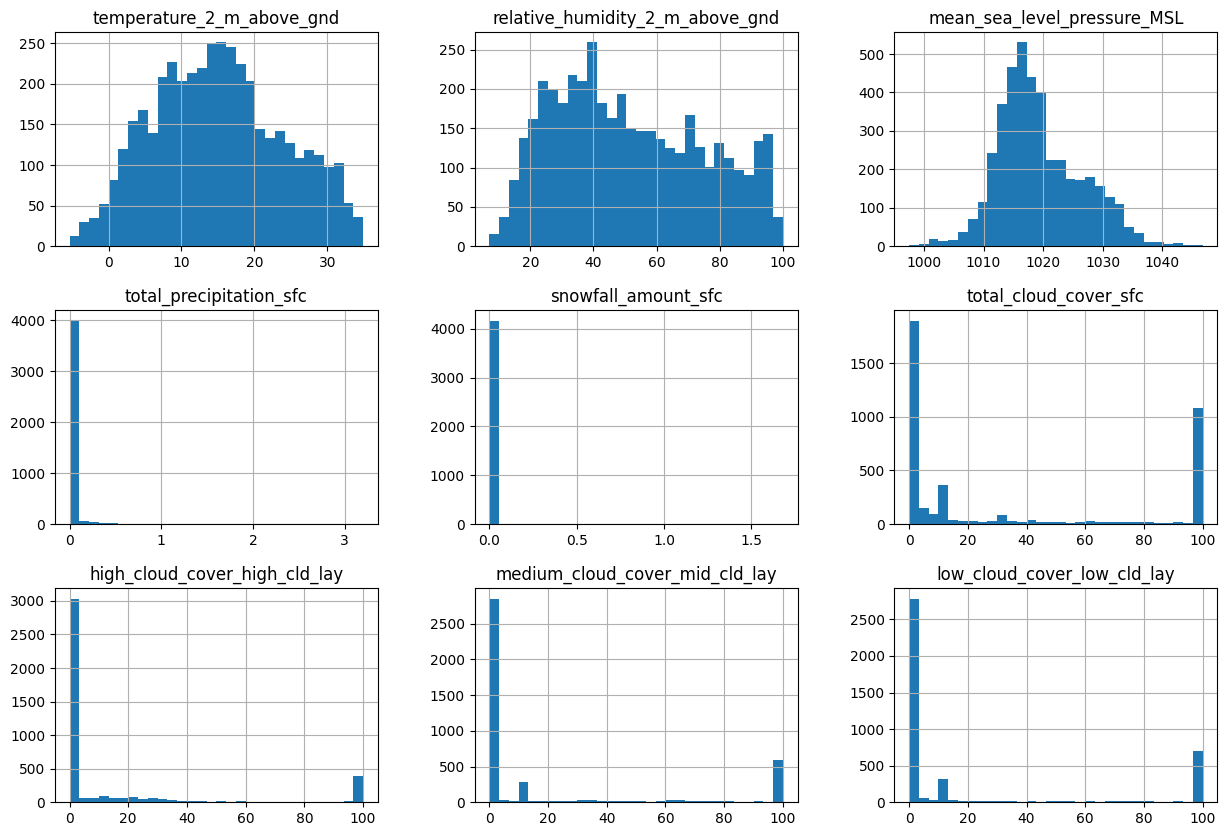

In [16]:
df[df.columns[:9]].hist(bins=30, figsize=(15,10))
plt.show()

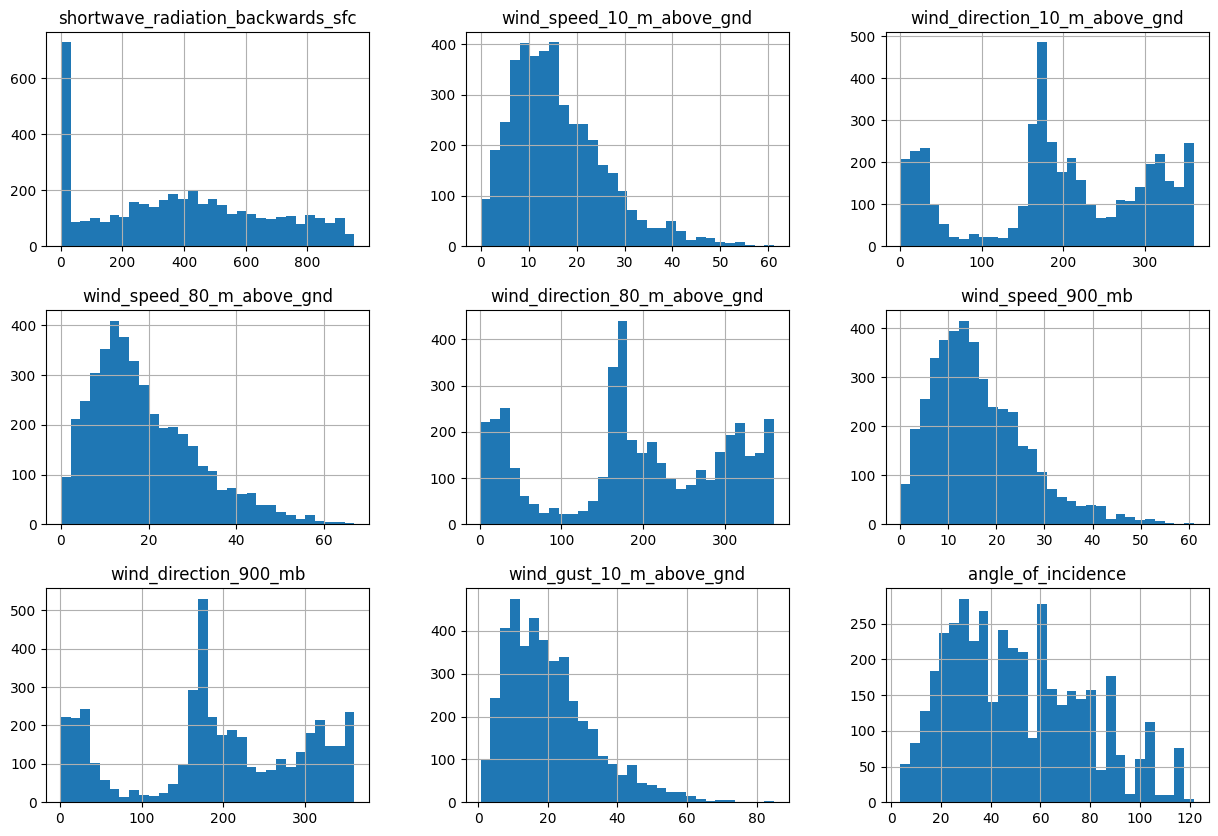

In [17]:
df[df.columns[9:18]].hist(bins=30, figsize=(15,10))
plt.show()

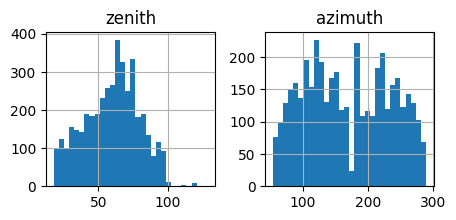

In [18]:
df[df.columns[18:20]].hist(bins=30, figsize=(5,2))
plt.show()

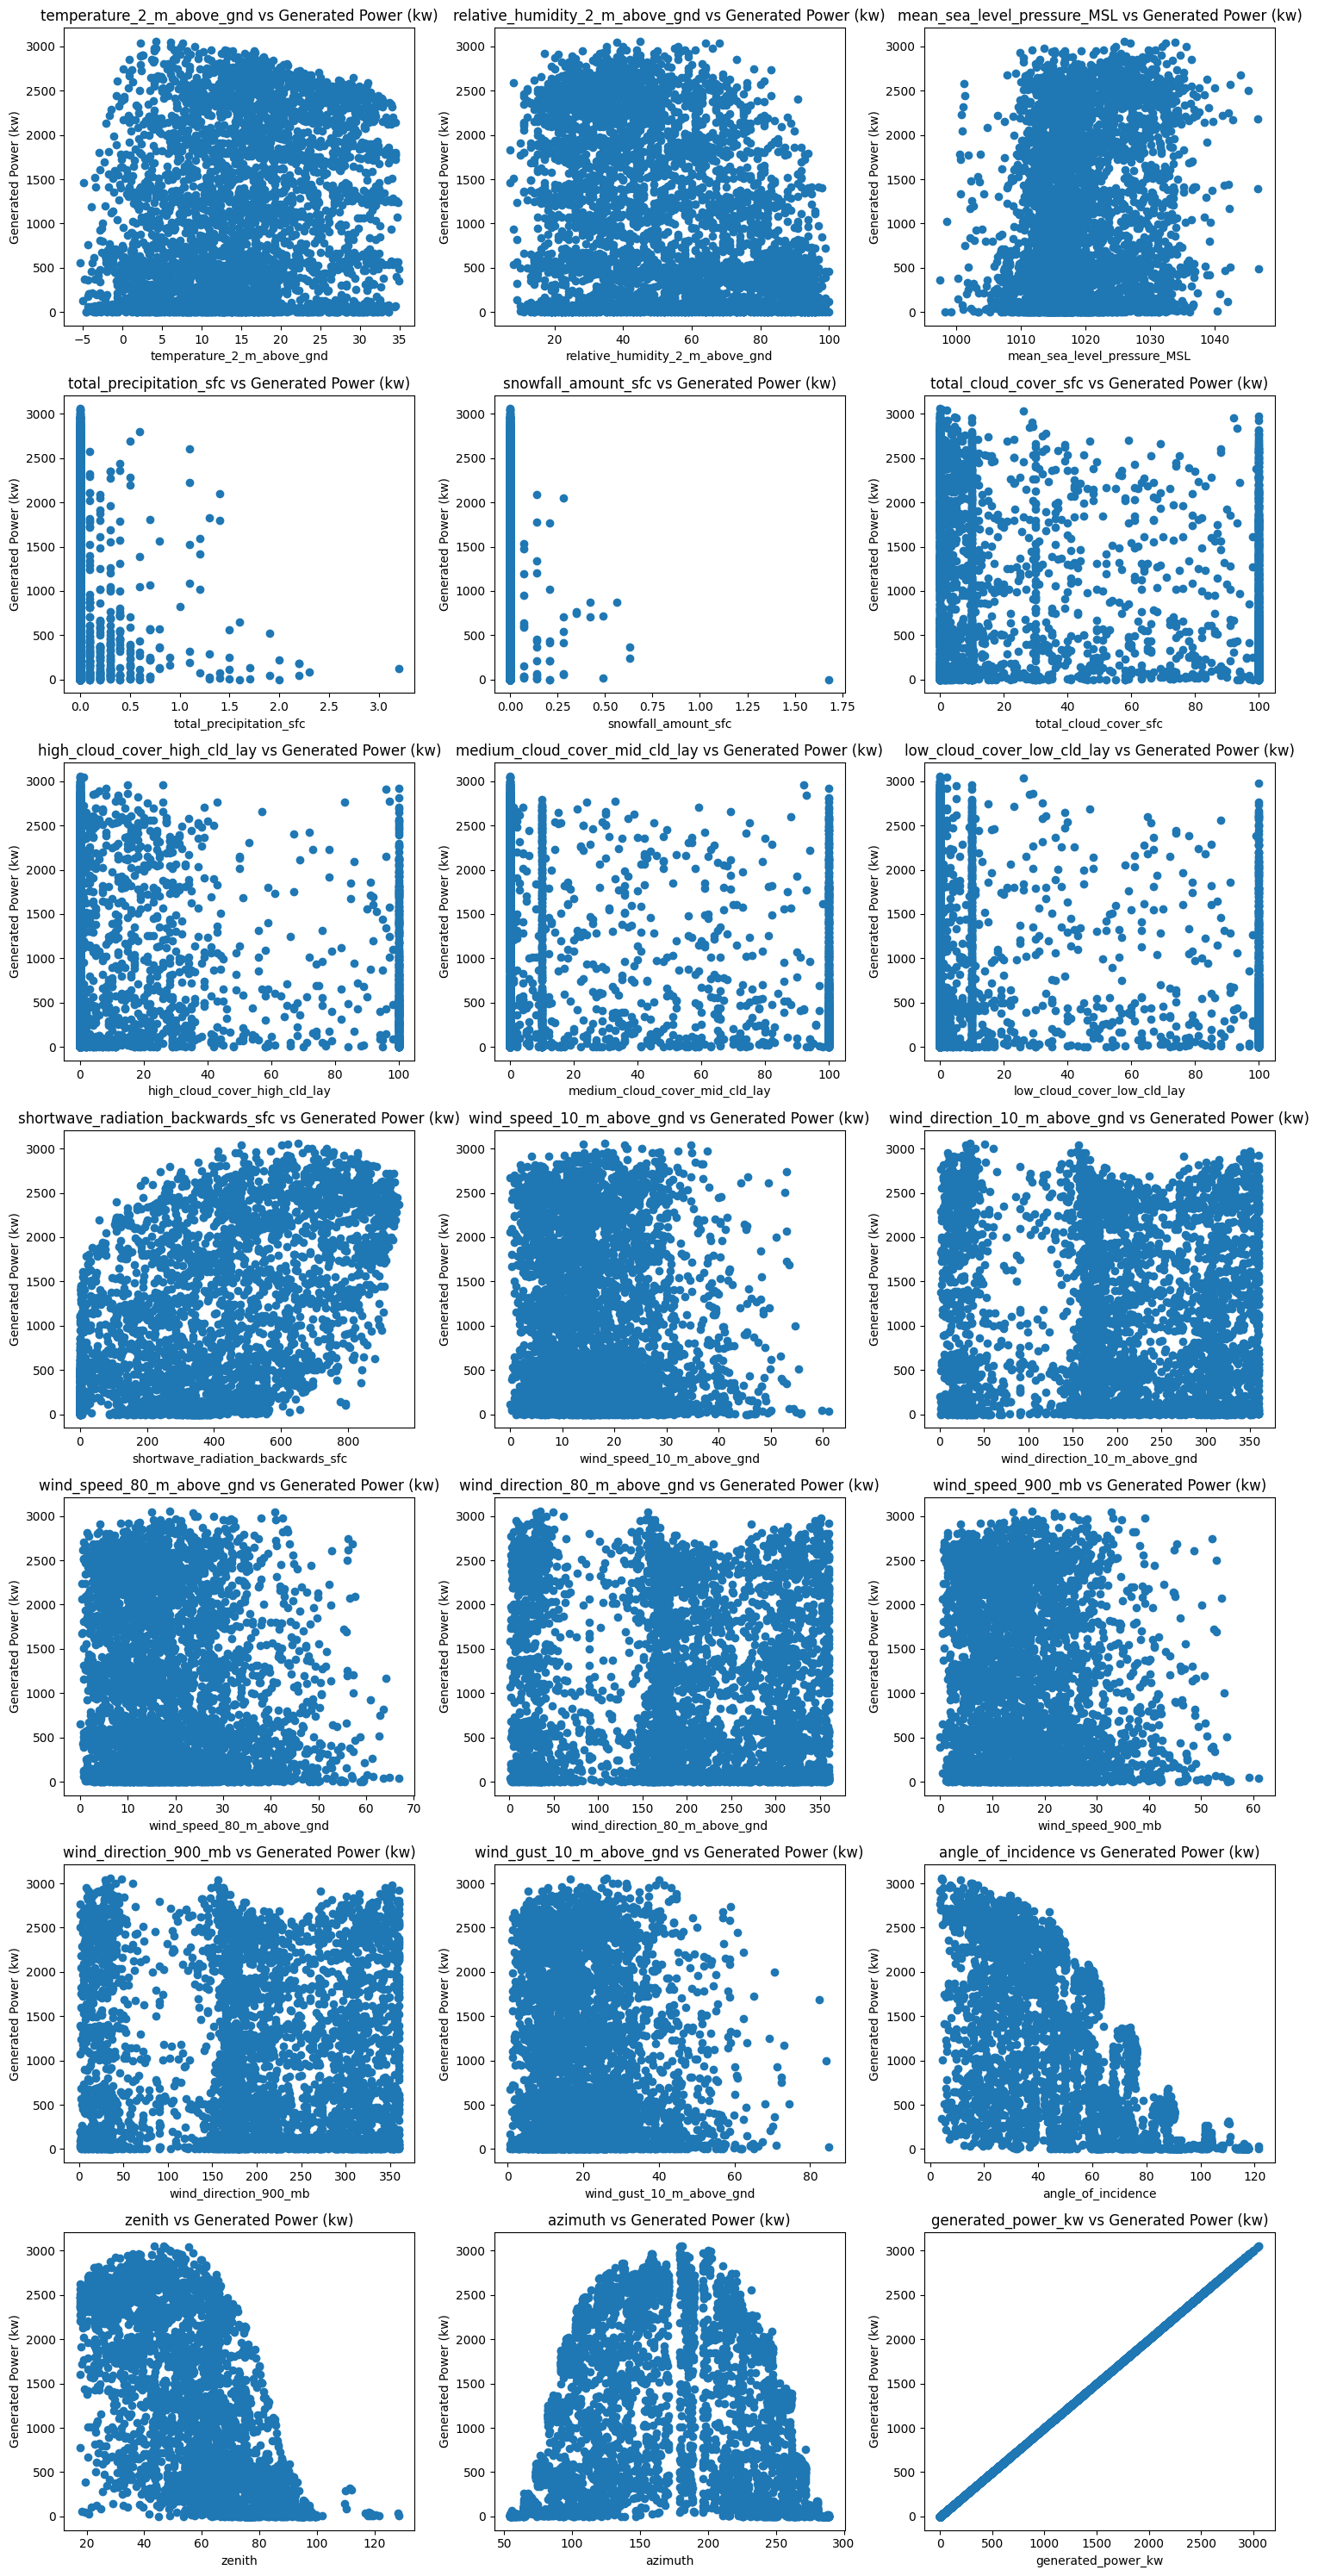

In [19]:
# Bivariate analysis
# Scatter plot with target feature
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    plt.scatter(df[column], df['generated_power_kw'])
    plt.title(f'{column} vs Generated Power (kw)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (kw)')
plt.tight_layout()
plt.show()

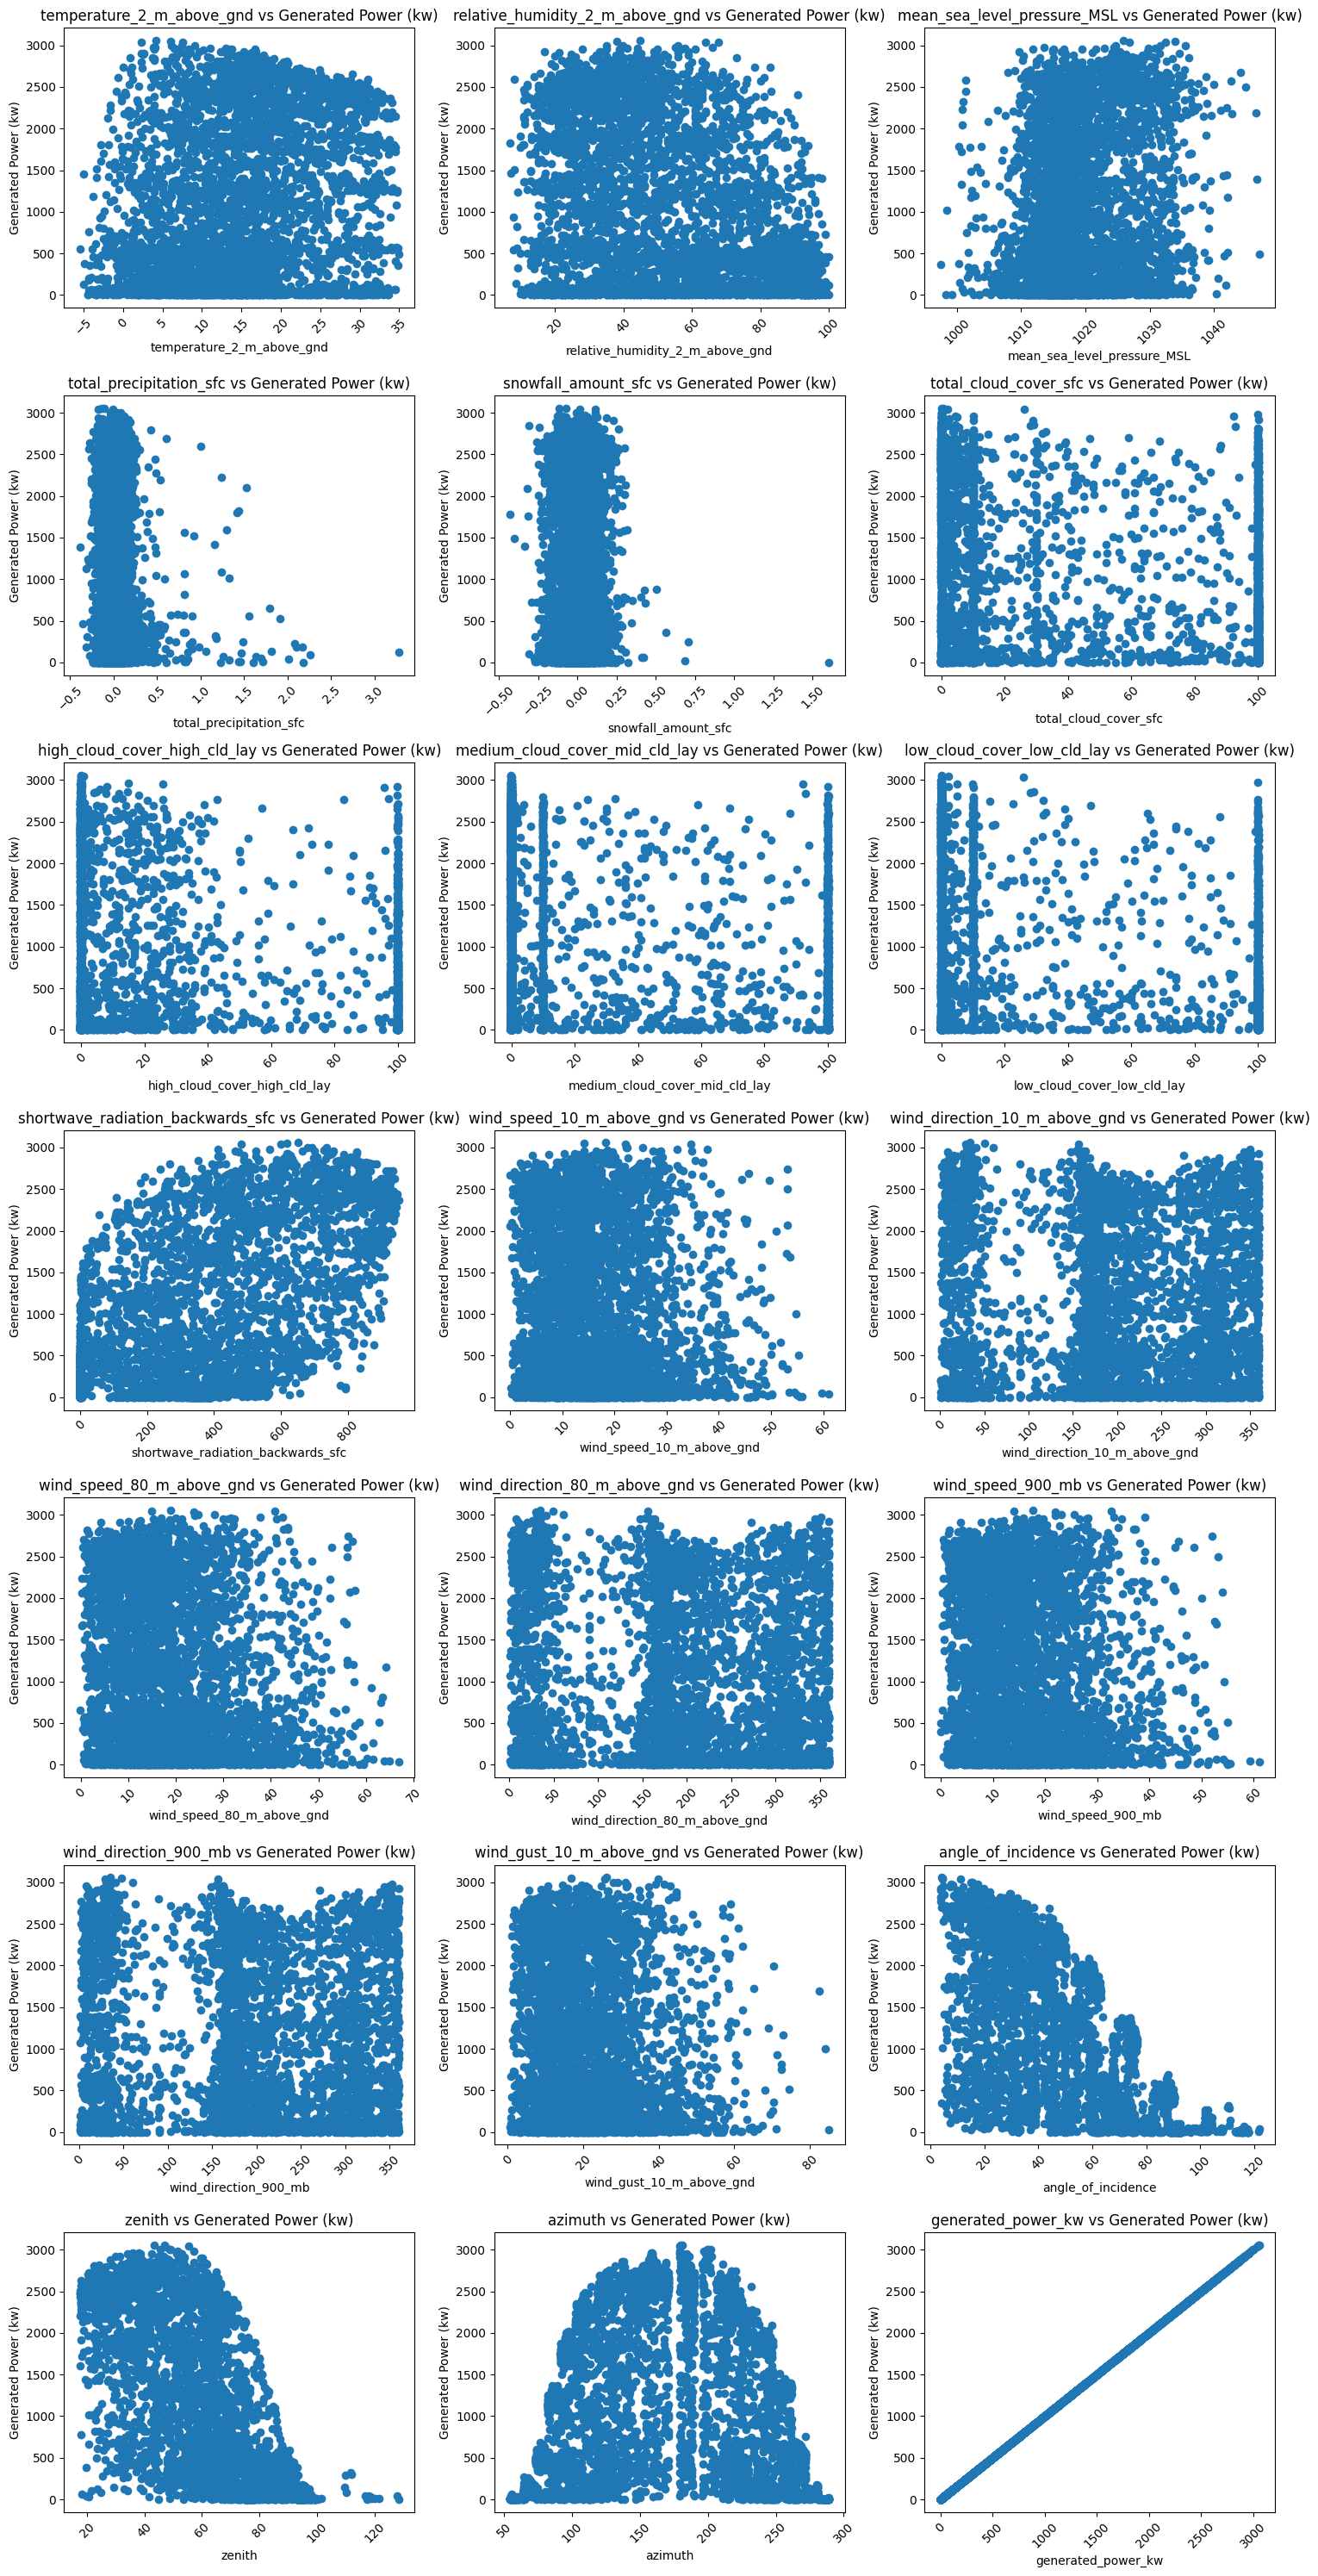

In [20]:
import numpy as np

plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    jittered_column = df[column] + np.random.normal(0, 0.1, len(df[column]))  # Add jitter
    plt.scatter(jittered_column, df['generated_power_kw'])
    plt.title(f'{column} vs Generated Power (kw)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (kw)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


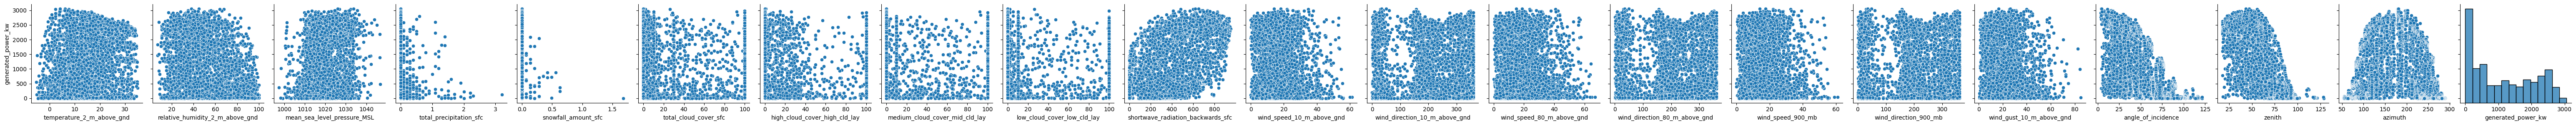

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load or create your DataFrame (replace with your actual data)
# df = pd.read_csv("your_data.csv")  # If loading from a CSV

# Pair plot of all features against 'generated_power_kw'
sns.pairplot(df, y_vars=['generated_power_kw'], height=3, aspect=1)

# Show the plot
plt.show()



In [22]:
df.corr()

temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.402240   
total_precipitation_sfc                            -0.083137   
snowfall_amount_sfc                                -0.121422   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.019522   
medium_cloud_cover_mid_cld_lay                     -0.100980   
low_cloud_cover_low_cld_lay                        -0.381876   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.172532   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.244869   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb                                  -0.198107   
wind_direction_900_mb                               0.043233   
wind_gust_10_m_above_gnd                           -0.188264   
angle_of_incidence                                 -0.090173   
zenith                                             -0.545646   
azimuth                                             0.381797   
generated_power_kw                                  0.217280   

                                   relative_humidity_2_m_above_gnd  \
temperature_2_m_above_gnd                                -0.771704   
relative_humidity_2_m_above_gnd                           1.000000   
mean_sea_level_pressure_MSL                               0.100529   
total_precipitation_sfc                                   0.168660   
snowfall_amount_sfc                                       0.113987   
total_cloud_cover_sfc                                     0.402895   
high_cloud_cover_high_cld_lay                             0.056452   
medium_cloud_cover_mid_cld_lay                            0.135347   
low_cloud_cover_low_cld_lay                               0.490402   
shortwave_radiation_backwards_sfc                        -0.721754   
wind_speed_10_m_above_gnd                                 0.109674   
wind_direction_10_m_above_gnd                             0.008902   
wind_speed_80_m_above_gnd                                 0.212868   
wind_direction_80_m_above_gnd                            -0.019408   
wind_speed_900_mb                                         0.135464   
wind_direction_900_mb                                     0.021068   
wind_gust_10_m_above_gnd                                  0.144807   
angle_of_incidence                                        0.268460   
zenith                                                    0.513748   
azimuth                                                  -0.525760   
generated_power_kw                                       -0.336783   

                                   mean_sea_level_pressure_MSL  \
temperature_2_m_above_gnd                            -0.402240   
relative_humidity_2_m_above_gnd                       0.100529   
mean_sea_level_pressure_MSL                           1.000000   
total_precipitation_sfc                              -0.159098   
snowfall_amount_sfc                                  -0.053871   
total_cloud_cover_sfc                                -0.151995   
high_cloud_cover_high_cld_lay                        -0.014646   
medium_cloud_cover_mid_cld_lay                       -0.129812   
low_cloud_cover_low_cld_lay                          -0.162043   
shortwave_radiation_backwards_sfc                    -0.188387   
wind_speed_10_m_above_gnd                            -0.170199   
wind_direction_10_m_above_gnd                        -0.119867   
wind_speed_80_m_above_gnd                            -0.131442   
wind_direction_80_m_above_gnd                        -0.161020   
wind_speed_900_mb                                    -0.145696   
wind_direction_900_mb        

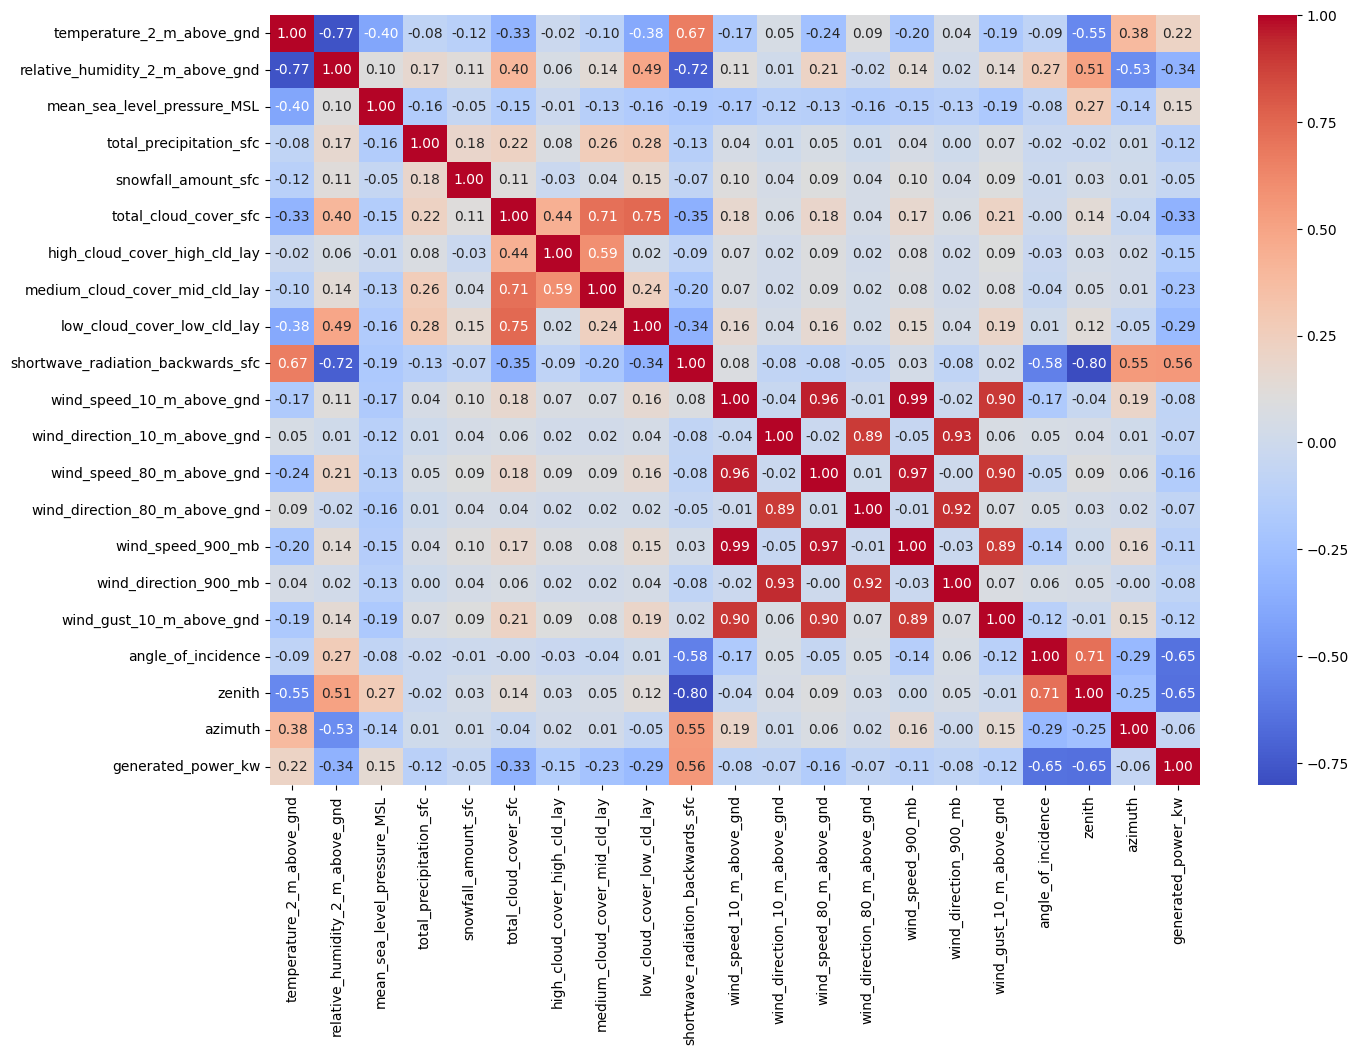

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f' )
plt.show()

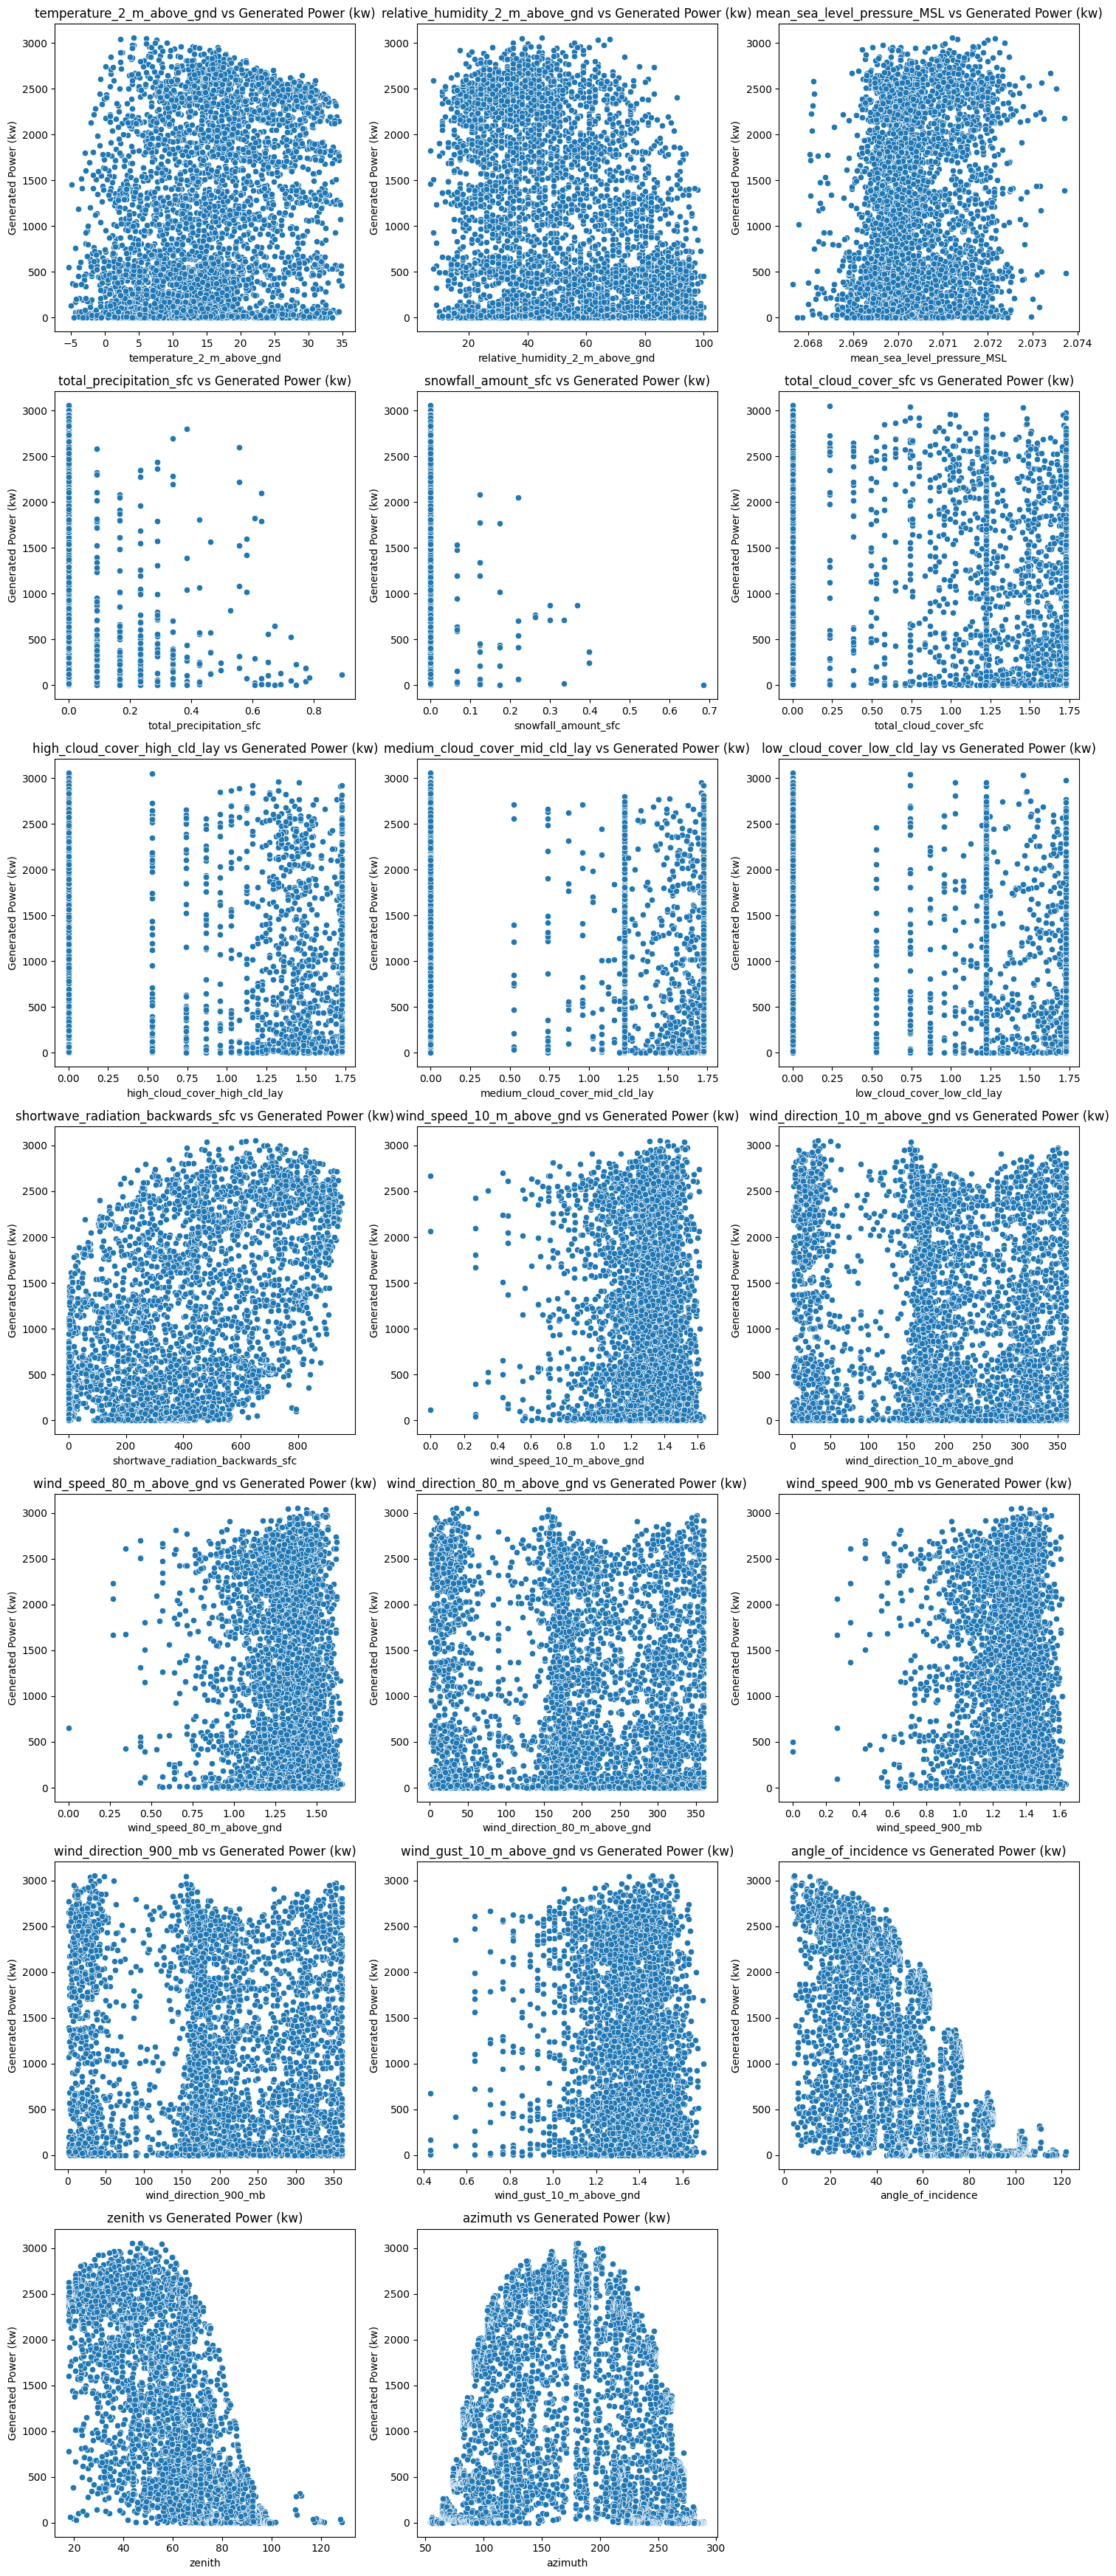

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define grid size
num_features = len(df.columns) - 1  # Exclude target column
num_cols = 3  # Number of columns in the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Generate scatter plots
feature_columns = [col for col in df.columns if col != 'generated_power_kw']  # Exclude target column

for i, column in enumerate(feature_columns):
    sns.scatterplot(x=df[column], y=df['generated_power_kw'], ax=axes[i])
    axes[i].set_title(f'{column} vs Generated Power (kw)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Generated Power (kw)')

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


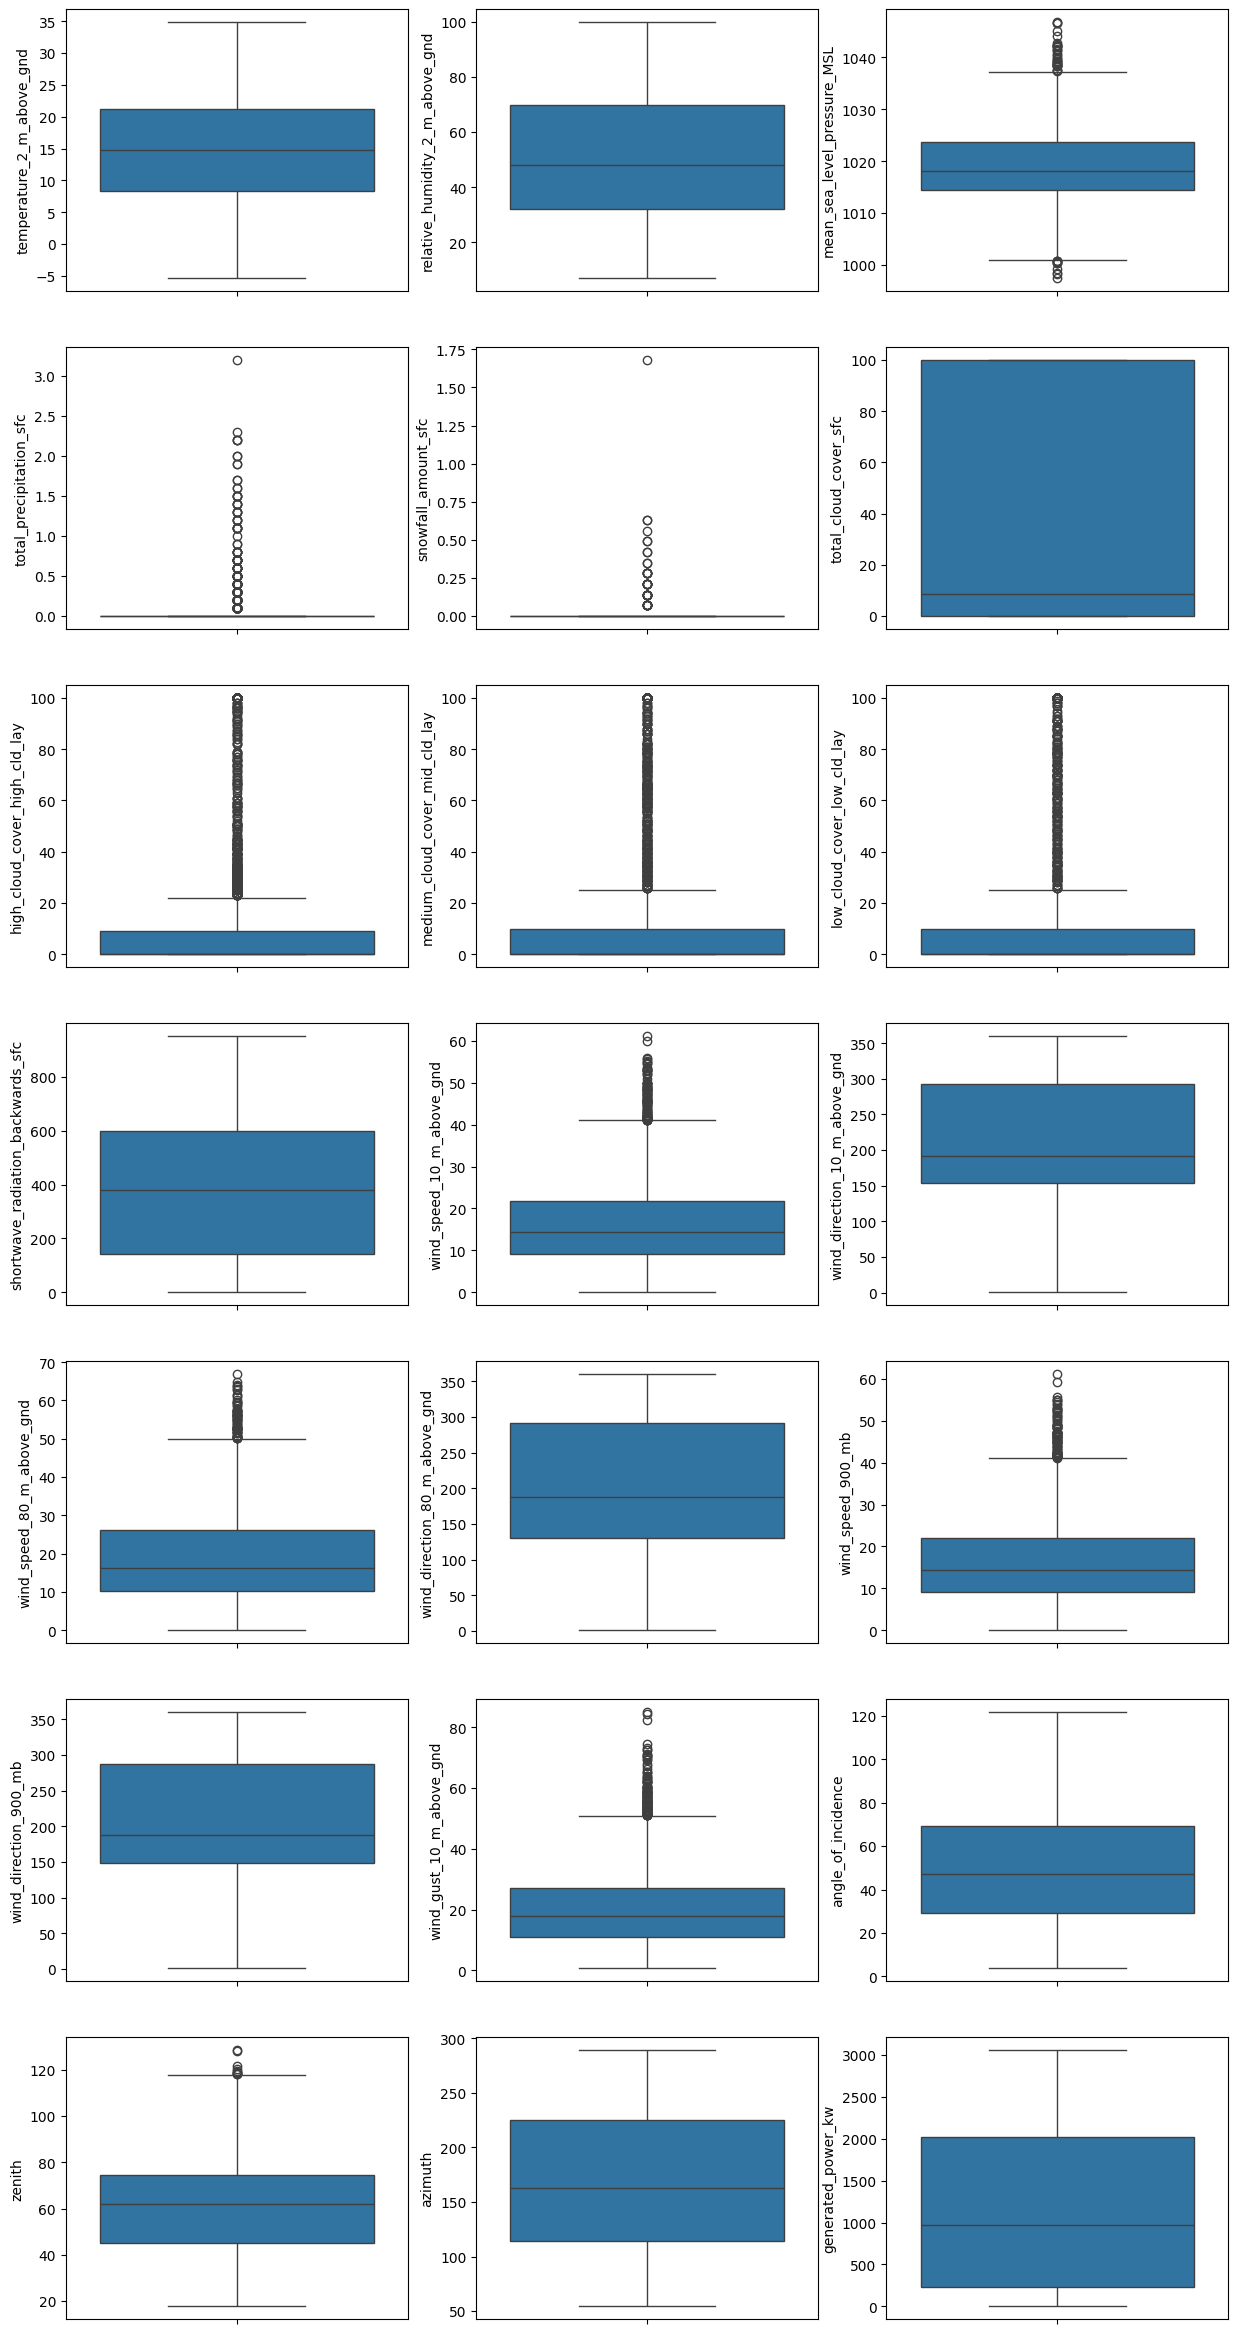

In [25]:
# Outlier
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot (7, 3, i+1)
    sns.boxplot(df[column])
plt.show()


### IMPROVISATIONS!


In [26]:
# Check skewness
from scipy.stats import skew
skewed_features = df.apply(lambda x: skew(x.dropna()))
print("Skewness of features:\n", skewed_features)

# Apply log transformation to skewed features (if needed)
for col in skewed_features[abs(skewed_features) > 0.5].index:
    df[col] = np.log1p(df[col])


Skewness of features:
 temperature_2_m_above_gnd             0.145934
relative_humidity_2_m_above_gnd       0.296765
mean_sea_level_pressure_MSL           0.517095
total_precipitation_sfc               8.627263
snowfall_amount_sfc                  26.268942
total_cloud_cover_sfc                 0.739236
high_cloud_cover_high_cld_lay         2.142525
medium_cloud_cover_mid_cld_lay        1.537427
low_cloud_cover_low_cld_lay           1.448766
shortwave_radiation_backwards_sfc     0.172632
wind_speed_10_m_above_gnd             1.017388
wind_direction_10_m_above_gnd        -0.300666
wind_speed_80_m_above_gnd             0.931188
wind_direction_80_m_above_gnd        -0.240328
wind_speed_900_mb                     0.989861
wind_direction_900_mb                -0.265674
wind_gust_10_m_above_gnd              1.110831
angle_of_incidence                    0.480275
zenith                               -0.111239
azimuth                               0.081121
generated_power_kw                   

In [27]:
# Features with significant skewness
skewed_cols = skewed_features[abs(skewed_features) > 0.5].index
print("Significantly skewed columns:\n", skewed_cols)

# Apply log1p transformation to reduce skewness
for col in skewed_cols:
    df[col] = np.log1p(df[col])  # Log(1 + x) to handle zero values

print("Log transformation applied to skewed columns.")


Significantly skewed columns:
 Index(['mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'wind_speed_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_speed_900_mb',
       'wind_gust_10_m_above_gnd'],
      dtype='object')
Log transformation applied to skewed columns.


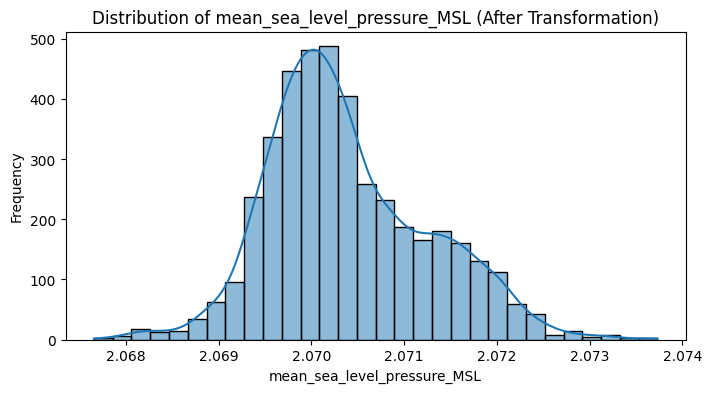

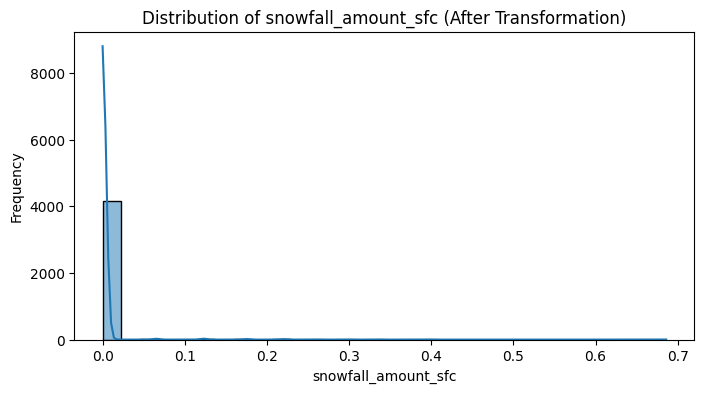

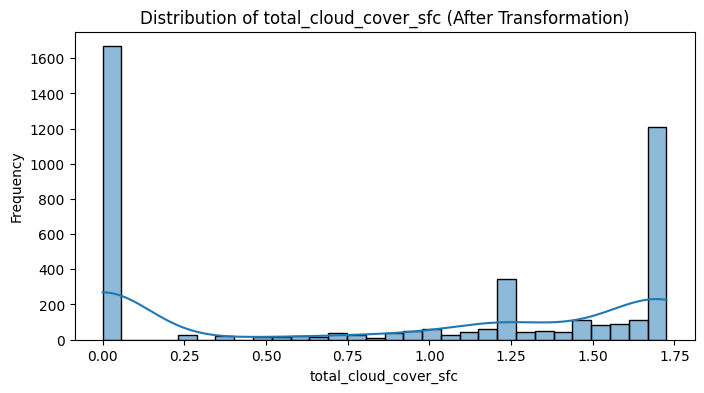

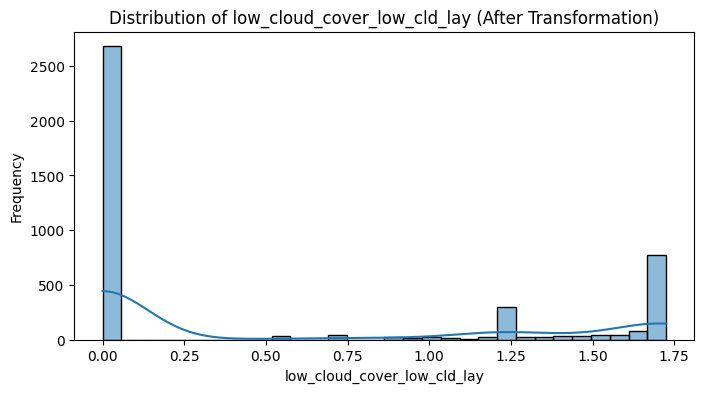

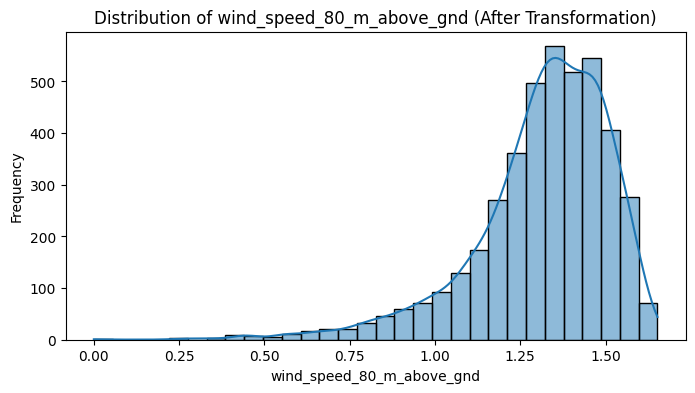

In [28]:
# Visualize the distributions of transformed features
import matplotlib.pyplot as plt
import seaborn as sns

for col in skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (After Transformation)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [29]:
# Plot a heatmap for feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=np.triu(np.ones_like(correlation_matrix)))
plt.title("Feature Correlation Heatmap")
plt.show()


In [30]:
# Identify highly correlated features (absolute correlation > 0.5, excluding self-correlation)
high_corr_features = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1]  # Remove self-correlations
high_corr_features = high_corr_features[high_corr_features > 0.5]

print("Highly Correlated Feature Pairs:\n", high_corr_features)


Highly Correlated Feature Pairs:
 wind_speed_10_m_above_gnd          wind_speed_900_mb                    0.975185
wind_speed_900_mb                  wind_speed_10_m_above_gnd            0.975185
wind_direction_900_mb              wind_direction_10_m_above_gnd        0.930226
wind_direction_10_m_above_gnd      wind_direction_900_mb                0.930226
wind_speed_80_m_above_gnd          wind_speed_900_mb                    0.923620
wind_speed_900_mb                  wind_speed_80_m_above_gnd            0.923620
wind_direction_900_mb              wind_direction_80_m_above_gnd        0.919390
wind_direction_80_m_above_gnd      wind_direction_900_mb                0.919390
wind_speed_10_m_above_gnd          wind_speed_80_m_above_gnd            0.909155
wind_speed_80_m_above_gnd          wind_speed_10_m_above_gnd            0.909155
wind_direction_80_m_above_gnd      wind_direction_10_m_above_gnd        0.891487
wind_direction_10_m_above_gnd      wind_direction_80_m_above_gnd        0.8

In [31]:
# Set up grid layout for histograms
num_cols = len(df.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)  # 4 columns per row
fig, axes = plt.subplots(rows, 4, figsize=(15, rows * 3))  # Adjust grid size

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each feature's histogram with KDE
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
